# Let's just see what's out there???
Starting with 5-player lineups for the 2021-22 season, as of Feb. 18, 2022

In [146]:
import pandas as pd
import numpy as np
import os

In [147]:
df = pd.read_csv("../data/processed/2122_lineups/five_player_lineups_2122.csv")
df.head()

,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank
0,C. Capela - B. Bogdanovic - D. Wright - J. Col...,ATL,1,0,1,0.000,24.0,15.0,45.0,0.333,5.0,17.0,0.294,6.0,11.0,0.545,6.0,17.0,23.0,12.0,5.0,5.0,3.0,4.0,6.0,8.0,41.0,-16.0,123,204,119,204,1,2,1,212,1,1,157,3,1,171,2,2,2,1,342,1,1,346,345,2,2,346
1,C. Capela - B. Bogdanovic - T. Young - C. Redd...,ATL,1,0,1,0.000,19.1,16.0,39.0,0.410,5.0,13.0,0.385,5.0,5.0,1.000,6.0,18.0,24.0,8.0,6.0,2.0,3.0,3.0,4.0,5.0,42.0,-6.0,123,204,119,204,2,1,2,183,1,2,121,8,19,1,2,1,1,4,345,5,1,343,324,9,1,328
2,C. Capela - B. Bogdanovic - J. Collins - T. Yo...,ATL,14,5,9,0.357,16.0,15.0,29.9,0.502,3.6,8.6,0.425,4.5,6.2,0.724,3.6,11.5,15.1,8.6,4.1,2.0,1.2,1.5,5.8,6.6,38.1,1.0,1,7,346,180,3,2,3,105,7,10,109,13,7,150,9,6,5,2,339,5,18,332,344,4,3,99
3,C. Capela - T. Luwawu-Cabarrot - J. Collins - ...,ATL,10,3,7,0.300,15.1,13.8,29.6,0.466,4.6,11.4,0.404,5.5,7.0,0.786,4.8,12.1,16.9,8.4,4.2,2.0,2.0,2.1,5.7,5.4,37.7,3.1,7,25,343,195,4,4,4,156,6,3,112,7,5,136,4,5,4,3,340,5,5,342,343,8,5,44
4,L. Williams - D. Gallinari - B. Bogdanovic - K...,ATL,1,0,1,0.000,14.9,12.0,25.0,0.480,5.0,11.0,0.455,9.0,11.0,0.818,2.0,13.0,15.0,7.0,2.0,0.0,2.0,1.0,4.0,7.0,38.0,2.0,123,204,119,204,5,7,6,149,1,4,99,1,1,128,20,3,6,8,300,137,5,293,324,3,4,73


### Finding the lineups that include Young

In [148]:
#df.primary_cause.str.contains("GUN", na=False).value_counts()
df.group_name.str.contains('T. Young', na=False).value_counts()
# Young is in the majority of the 5-player line-ups the Hawks have had this season 
#homicides_df = df[df.manner_of_death == 'HOMICIDE'].copy()


True     176
False    170
Name: group_name, dtype: int64

In [149]:
df.group_name.str.contains('T. Young', na=False).value_counts(normalize=True)
# Young is in roughly 51% of the lineups 

True     0.508671
False    0.491329
Name: group_name, dtype: float64

<AxesSubplot:>

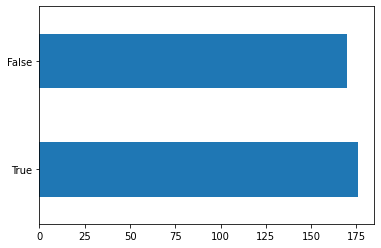

In [150]:
# Let's plot! 
df.group_name.str.contains('T. Young', na=False).value_counts().plot(kind='barh')
# NOTE TO SELF: I think this will be cooler as a 3-way stacked bar chart showing Trae and non Trae combos for 5, 3, and 2 player lineups

### Adding a boolean column for Trae and non-Trae:

In [179]:
df['trae'] = (df.group_name.str.contains('T. Young', na=False) == True) 
df.head()
#df['trae'].value_counts()
df['trae'] = df['trae'].astype(int)
df['trae'].value_counts()

0    182
1     22
Name: trae, dtype: int64

In [152]:
df.head()

,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank,trae
0,C. Capela - B. Bogdanovic - D. Wright - J. Col...,ATL,1,0,1,0.000,24.0,15.0,45.0,0.333,5.0,17.0,0.294,6.0,11.0,0.545,6.0,17.0,23.0,12.0,5.0,5.0,3.0,4.0,6.0,8.0,41.0,-16.0,123,204,119,204,1,2,1,212,1,1,157,3,1,171,2,2,2,1,342,1,1,346,345,2,2,346,0
1,C. Capela - B. Bogdanovic - T. Young - C. Redd...,ATL,1,0,1,0.000,19.1,16.0,39.0,0.410,5.0,13.0,0.385,5.0,5.0,1.000,6.0,18.0,24.0,8.0,6.0,2.0,3.0,3.0,4.0,5.0,42.0,-6.0,123,204,119,204,2,1,2,183,1,2,121,8,19,1,2,1,1,4,345,5,1,343,324,9,1,328,1
2,C. Capela - B. Bogdanovic - J. Collins - T. Yo...,ATL,14,5,9,0.357,16.0,15.0,29.9,0.502,3.6,8.6,0.425,4.5,6.2,0.724,3.6,11.5,15.1,8.6,4.1,2.0,1.2,1.5,5.8,6.6,38.1,1.0,1,7,346,180,3,2,3,105,7,10,109,13,7,150,9,6,5,2,339,5,18,332,344,4,3,99,1
3,C. Capela - T. Luwawu-Cabarrot - J. Collins - ...,ATL,10,3,7,0.300,15.1,13.8,29.6,0.466,4.6,11.4,0.404,5.5,7.0,0.786,4.8,12.1,16.9,8.4,4.2,2.0,2.0,2.1,5.7,5.4,37.7,3.1,7,25,343,195,4,4,4,156,6,3,112,7,5,136,4,5,4,3,340,5,5,342,343,8,5,44,1
4,L. Williams - D. Gallinari - B. Bogdanovic - K...,ATL,1,0,1,0.000,14.9,12.0,25.0,0.480,5.0,11.0,0.455,9.0,11.0,0.818,2.0,13.0,15.0,7.0,2.0,0.0,2.0,1.0,4.0,7.0,38.0,2.0,123,204,119,204,5,7,6,149,1,4,99,1,1,128,20,3,6,8,300,137,5,293,324,3,4,73,0


## Now we can really get to business comparing
* debating about making a different df for trae and non-trae columns. Idk why, but I don't really want to, not sure if that's right
* also now seems like a good time to give insight into all the column names, see below

### Column names according to [NBA.com](https://www.nba.com/stats/lineups/traditional/?Season=2021-22&SeasonType=Regular%20Season&TeamID=1610612737)

* GP: Games played
* MIN: Minutes played
* PTS: Points
* FGM: Field goals made
* FGA: Field goals attempted
* 3PM: 3 Point field goals made
* 3PA: 3 Point field goals attempted
* 3P%: 3 Point field goals percentage
* FTM: Free throws made
* FTA: Free throws attempted
* FT%: Free throw percentage
* OREB: Offensive rebounds
* DREB: Defensive rebounds
* REB: Rebounds
* AST Assists
* TOV: Turnovers
* STL: Steals
* BLK: Blocks
* BLKA: Blocked field goal attempts
* PF: Personal fouls
* PFD: Personal fouls drawn
* PTS: Points+/- Plus-Minus

**NOTE:** These are the columns on the public-facing view of the data. Our scrape gave us some extra units of analysis to look at, but we're going to start with what we have above.

Here are my initial questions for this data: 
* How much does Trae impact 3 point attempts? Obviously he is going to be contribuiting a significant amount to those attempts  himself...
* How do total assists change when Trae is in? 
* Points - easy but good baseline 
* Could I average each player's stats for when Trae is in their line up and when he is not? 
* Rebounds are interesting bc Trae has very little to do with that himself 
* Turnovers I think are less interesting because when Trae is in, he will handle the ball, so then this becomes just a personal stat
* Blocked field goal attempts are interesting for the same reason as rebounds 
* Personal fouls drawn (lol)
* Personal fouls 

In [24]:
df[df['trae'] == 0].ast.mean()

1.4423529411764706

In [25]:
df[df['trae'] == 1].ast.mean()

1.3727272727272728

In [27]:
df[df['trae'] == 0].pts.mean()

6.364705882352941

In [28]:
df[df['trae'] == 1].pts.mean()

6.749431818181819

In [29]:
df[df['trae'] == 0].reb.mean()

2.8323529411764707

In [30]:
df[df['trae'] == 1].reb.mean()

2.585227272727273

In [34]:
df.group_name.describe()

count                                                   346
unique                                                  346
top       C. Capela - B. Bogdanovic - D. Wright - J. Col...
freq                                                      1
Name: group_name, dtype: object

# Switching to 2-player lineups

In [189]:
df = pd.read_csv("../data/processed/2122_lineups/two_player_lineups_2122.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank
0,J. Collins - T. Young,ATL,46,23,23,0.500,27.9,25.1,51.8,0.484,7.0,18.8,0.370,9.7,12.4,0.784,5.8,20.0,25.8,15.1,7.1,3.8,2.8,2.7,10.8,11.9,66.8,1.5,3,3,199,75,1,1,2,68,4,2,111,7,5,123,7,1,2,1,201,3,3,196,200,2,1,57
1,T. Young - D. Hunter,ATL,29,14,15,0.483,26.9,23.9,49.2,0.486,6.6,17.6,0.377,9.8,12.4,0.794,5.4,18.4,23.9,14.0,7.2,3.7,2.5,2.7,10.9,12.0,64.3,-0.5,24,25,178,102,2,2,5,65,5,4,101,6,4,116,9,3,3,2,202,5,5,195,201,1,5,121
2,L. Williams - W. Iwundu,ATL,1,1,0,1.000,26.5,22.0,53.0,0.415,7.0,20.0,0.350,15.0,17.0,0.882,8.0,15.0,23.0,9.0,1.0,2.0,3.0,5.0,13.0,10.0,66.0,1.0,165,122,1,1,3,6,1,141,3,1,138,1,1,47,1,16,7,21,33,29,1,204,203,7,2,64
3,C. Capela - T. Young,ATL,47,24,23,0.511,24.9,23.1,47.6,0.486,6.5,16.9,0.384,8.4,10.8,0.774,5.9,17.9,23.9,13.3,6.2,3.7,2.3,2.6,9.8,10.1,61.1,1.1,2,1,199,74,5,3,7,66,6,6,94,12,9,131,6,5,4,3,199,4,8,194,199,5,6,63
4,C. Capela - W. Iwundu,ATL,2,1,1,0.500,24.9,23.0,50.5,0.455,8.0,18.5,0.432,11.0,12.0,0.917,7.5,15.5,23.0,12.0,2.0,4.0,2.0,4.5,9.0,10.5,65.0,4.5,135,122,30,75,4,4,3,92,1,3,51,4,6,31,2,14,7,7,103,1,13,202,195,4,3,18


### Creating Trae Young boolean

In [190]:
df['trae'] = (df.group_name.str.contains('T. Young', na=False) == True) 
df.head()
#df['trae'].value_counts()
df['trae'] = df['trae'].astype(int)
df['trae'].value_counts()

0    182
1     22
Name: trae, dtype: int64

In [191]:
df.group_name.str.contains('T. Young', na=False).value_counts(normalize=True)
# Young is in roughly 11% of the Hawk's player pairings

False    0.892157
True     0.107843
Name: group_name, dtype: float64

### Looking at some averages between the two pairings

**Up first:** Rebounds

In [91]:
df[df['trae'] == 0].reb.mean()

7.592307692307692

In [52]:
df[df['trae'] == 1].reb.mean()

11.913636363636364

**Points**

In [53]:
df[df['trae'] == 0].pts.mean()

18.883516483516484

In [54]:
df[df['trae'] == 1].pts.mean()
# Trae almost doubles the pairs' points output 

32.53181818181818

<AxesSubplot:ylabel='trae'>

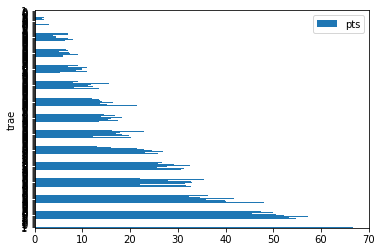

In [74]:
df.plot(kind='barh', x='trae', y='pts')

**Assists:**
* With: avg. assists = 6.76
* Without: avg. assists = 4.04
* Overall: avg. assists = 4.33

In [55]:
df[df['trae'] == 0].ast.mean()

4.035164835164835

In [56]:
df[df['trae'] == 1].ast.mean()

6.75909090909091

In [84]:
df.ast.mean()

4.328921568627451

array([<AxesSubplot:title={'center':'gp'}>,
       <AxesSubplot:title={'center':'w'}>,
       <AxesSubplot:title={'center':'l'}>,
       <AxesSubplot:title={'center':'w_pct'}>,
       <AxesSubplot:title={'center':'min'}>,
       <AxesSubplot:title={'center':'fgm'}>,
       <AxesSubplot:title={'center':'fga'}>,
       <AxesSubplot:title={'center':'fg_pct'}>,
       <AxesSubplot:title={'center':'fg3m'}>,
       <AxesSubplot:title={'center':'fg3a'}>,
       <AxesSubplot:title={'center':'fg3_pct'}>,
       <AxesSubplot:title={'center':'ftm'}>,
       <AxesSubplot:title={'center':'fta'}>,
       <AxesSubplot:title={'center':'ft_pct'}>,
       <AxesSubplot:title={'center':'oreb'}>,
       <AxesSubplot:title={'center':'dreb'}>,
       <AxesSubplot:title={'center':'reb'}>,
       <AxesSubplot:title={'center':'ast'}>,
       <AxesSubplot:title={'center':'tov'}>,
       <AxesSubplot:title={'center':'stl'}>,
       <AxesSubplot:title={'center':'blk'}>,
       <AxesSubplot:title={'center':'blka'}>

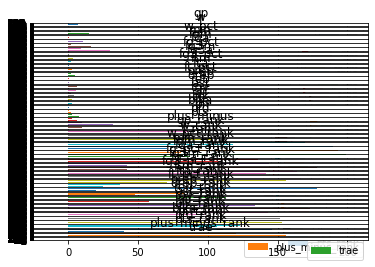

In [78]:
#df.plot(kind='barh', subplots='trae')

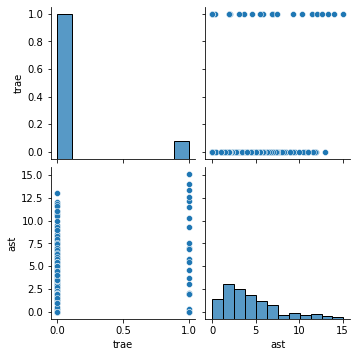

In [89]:
import seaborn as sns
#sns.pairplot(df)
#sns.countplot(x="variable", hue="value", data=pd.melt(df3))
sns.pairplot(data=df, vars=['trae', 'ast'])

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

**3-pointers attempted** 

In [57]:
df[df['trae'] == 0]['fg3a'].mean()

5.675824175824176

In [58]:
df[df['trae'] == 1]['fg3a'].mean()

9.345454545454546

**Field goal percent made** 

In [59]:
df[df['trae'] == 0].fg_pct.mean()

0.4472032967032967

In [60]:
df[df['trae'] == 1].fg_pct.mean()

0.4509090909090908

**3-pointer percent made**

In [61]:
df[df['trae'] == 0].fg3_pct.mean()

0.38484615384615384

In [62]:
df[df['trae'] == 1].fg3_pct.mean()

0.3495909090909091

**Offensive rebounds**

In [64]:
df[df['trae'] == 0].oreb.mean()

1.684065934065934

In [65]:
df[df['trae'] == 1].oreb.mean()

2.795454545454545

**Defensive rebounds**

In [66]:
df[df['trae'] == 0].dreb.mean()

5.907142857142857

In [67]:
df[df['trae'] == 1].dreb.mean()

9.118181818181819

In [ ]:
# Compare avg as pairs with trae to individual averages
# could do this for all kinds of line ups but start with pairs 

# Comparing pairs with Trae in them 

In [102]:
# This creates a df with every player who has been on the Hawks during the 2021-22 season + Young
df2 = df[df['trae'] == 1].reset_index()

In [104]:
df2 = df2.drop('index',1)

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_65465/3775288115.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop('index',1)


In [105]:
df2.head()

,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank,trae
0,J. Collins - T. Young,ATL,46,23,23,0.500,27.9,25.1,51.8,0.484,7.0,18.8,0.370,9.7,12.4,0.784,5.8,20.0,25.8,15.1,7.1,3.8,2.8,2.7,10.8,11.9,66.8,1.5,3,3,199,75,1,1,2,68,4,2,111,7,5,123,7,1,2,1,201,3,3,196,200,2,1,57,1
1,T. Young - D. Hunter,ATL,29,14,15,0.483,26.9,23.9,49.2,0.486,6.6,17.6,0.377,9.8,12.4,0.794,5.4,18.4,23.9,14.0,7.2,3.7,2.5,2.7,10.9,12.0,64.3,-0.5,24,25,178,102,2,2,5,65,5,4,101,6,4,116,9,3,3,2,202,5,5,195,201,1,5,121,1
2,C. Capela - T. Young,ATL,47,24,23,0.511,24.9,23.1,47.6,0.486,6.5,16.9,0.384,8.4,10.8,0.774,5.9,17.9,23.9,13.3,6.2,3.7,2.3,2.6,9.8,10.1,61.1,1.1,2,1,199,74,5,3,7,66,6,6,94,12,9,131,6,5,4,3,199,4,8,194,199,5,6,63,1
3,W. Iwundu - T. Young,ATL,2,1,1,0.500,24.7,22.5,49.5,0.455,7.5,17.5,0.429,12.5,13.5,0.926,7.5,16.0,23.5,11.5,2.5,4.0,2.5,4.5,9.5,11.0,65.0,5.0,135,122,30,75,6,5,4,97,2,5,53,2,3,29,2,9,6,11,142,1,6,202,197,3,3,13,1
4,B. Bogdanovic - T. Young,ATL,36,18,18,0.500,23.7,21.1,44.3,0.477,5.9,16.1,0.367,8.3,10.2,0.812,5.0,16.8,21.7,12.1,5.8,3.6,2.0,2.4,8.6,9.8,56.4,0.6,14,17,190,75,8,8,9,74,12,8,118,13,11,99,11,6,10,6,194,6,13,192,193,8,8,78,1


<AxesSubplot:title={'center':'Avg. poitns per game'}, ylabel='Collins-Young'>

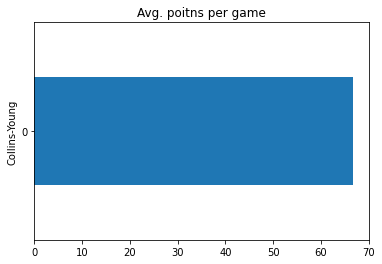

In [114]:
df2[df2.group_name.str.contains('Collins')].pts.plot(kind='barh', ylabel='Collins-Young', title='Avg. poitns per game')

In [117]:
#could do a box and whiskers plot for this and for the above
df[df.group_name.str.contains('Collins')].pts.describe()

count    19.000000
mean     26.847368
std      18.412658
min       2.000000
25%      14.050000
50%      22.000000
75%      39.400000
max      66.800000
Name: pts, dtype: float64

In [118]:
collins = df[df.group_name.str.contains('Collins')]

In [120]:
collins = collins.drop(0,0)

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_65465/3481113838.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  collins = collins.drop(0,0)


In [128]:
#collins = collins.reset_index()
#collins = collins.drop('level_0',1)
#collins = collins.drop('index', 1)
collins.shape

(18, 55)

In [130]:
df[df.group_name.str.contains('Collins')].pts.mean()

26.847368421052636

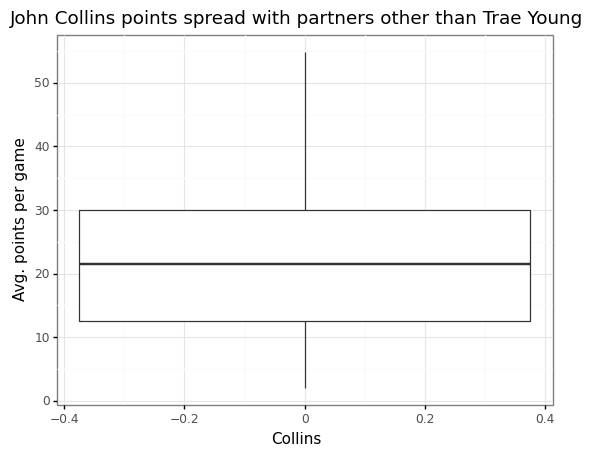

<ggplot: (321961930)>

In [135]:
from plotnine import *

(
    ggplot(collins, aes(y='pts',x=0))
    +geom_boxplot()
    + theme_bw()
    + labs(
            title = "John Collins points spread with partners other than Trae Young",
            y = "Avg. points per game",
            x = "Collins")

)
#( ggplot(mtcars,aes(y='mpg',x=0))+geom_boxplot() )


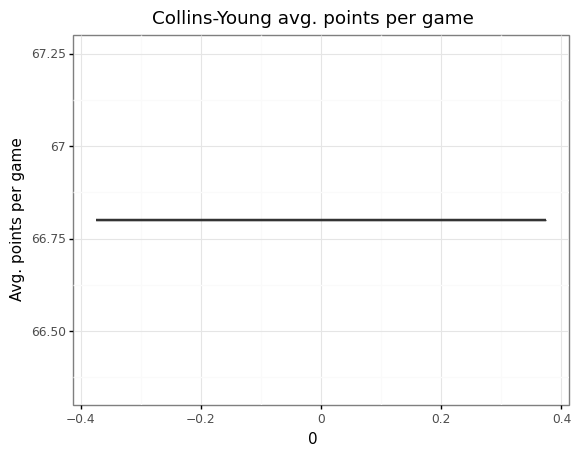

<ggplot: (322092606)>

In [137]:
(
    ggplot(df2[df2.group_name.str.contains('Collins')], aes(y='pts',x=0))
    +geom_boxplot()
    + theme_bw()
    + labs(
            title = "Collins-Young avg. points per game",
            y = "Avg. points per game",
            )

)

#i dont really need the x-axis for anything 

# Creating groups by player name 
* **Step 1:** Copy the group_name column
* **Step 2:** Split the names in the new column, saving both into separate columns
* **Step 3:** Drop copied version of group_name and the column with the second player's name

**Result:** We now have a new column, "player_name," that contains the name of the first person in each pairing

In [183]:
# df.head(20)
# #df = df.assign(player_name = lambda x: (x['group_name'] /500 * 100))
# #df['trae'] = (df.group_name.str.contains('T. Young', na=False) == True) 
# df['player'] = (df.group_name.str.contains('J. Collins', na=False) == True)
# # df.player.value_counts()
# df['player'] = df['player'].replace({'False':'', "True":"J. Collins"}, inplace=True)
# df.head()


,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank,trae,player_name,player
0,J. Collins - T. Young,ATL,46,23,23,0.500,27.9,25.1,51.8,0.484,7.0,18.8,0.370,9.7,12.4,0.784,5.8,20.0,25.8,15.1,7.1,3.8,2.8,2.7,10.8,11.9,66.8,1.5,3,3,199,75,1,1,2,68,4,2,111,7,5,123,7,1,2,1,201,3,3,196,200,2,1,57,1,J. Collins,True
1,T. Young - D. Hunter,ATL,29,14,15,0.483,26.9,23.9,49.2,0.486,6.6,17.6,0.377,9.8,12.4,0.794,5.4,18.4,23.9,14.0,7.2,3.7,2.5,2.7,10.9,12.0,64.3,-0.5,24,25,178,102,2,2,5,65,5,4,101,6,4,116,9,3,3,2,202,5,5,195,201,1,5,121,1,T. Young,False
2,L. Williams - W. Iwundu,ATL,1,1,0,1.000,26.5,22.0,53.0,0.415,7.0,20.0,0.350,15.0,17.0,0.882,8.0,15.0,23.0,9.0,1.0,2.0,3.0,5.0,13.0,10.0,66.0,1.0,165,122,1,1,3,6,1,141,3,1,138,1,1,47,1,16,7,21,33,29,1,204,203,7,2,64,0,L. Williams,False
3,C. Capela - T. Young,ATL,47,24,23,0.511,24.9,23.1,47.6,0.486,6.5,16.9,0.384,8.4,10.8,0.774,5.9,17.9,23.9,13.3,6.2,3.7,2.3,2.6,9.8,10.1,61.1,1.1,2,1,199,74,5,3,7,66,6,6,94,12,9,131,6,5,4,3,199,4,8,194,199,5,6,63,1,C. Capela,False
4,C. Capela - W. Iwundu,ATL,2,1,1,0.500,24.9,23.0,50.5,0.455,8.0,18.5,0.432,11.0,12.0,0.917,7.5,15.5,23.0,12.0,2.0,4.0,2.0,4.5,9.0,10.5,65.0,4.5,135,122,30,75,4,4,3,92,1,3,51,4,6,31,2,14,7,7,103,1,13,202,195,4,3,18,0,C. Capela,False


In [192]:
df['player'] = df['group_name']
# df.head()

In [194]:
df[['player1', 'player2']] = df['player'].str.split(' - ', expand=True)
#dup data frame and swap columns 
df.head(20)
df = df.drop('player',1)

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_65465/2187364517.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [198]:
#this copies each pairing so that we don't miss anyone 

df.head(20)

pd.set_option('display.max_rows', 300)

copied = df.copy()
temp = copied.player2.copy()
copied.player2 = copied.player1
copied.player1 = temp
combined = pd.concat([df, copied], ignore_index=True)



In [200]:
df = combined

In [331]:
(
    ggplot(df, aes(x='player1', y='pts'))
    +geom_boxplot()
    + theme_bw()
    + coord_filp()
    + labs(
            title = "Avg. pts per game within partnerships",)

)

NameError: name 'coord_filp' is not defined

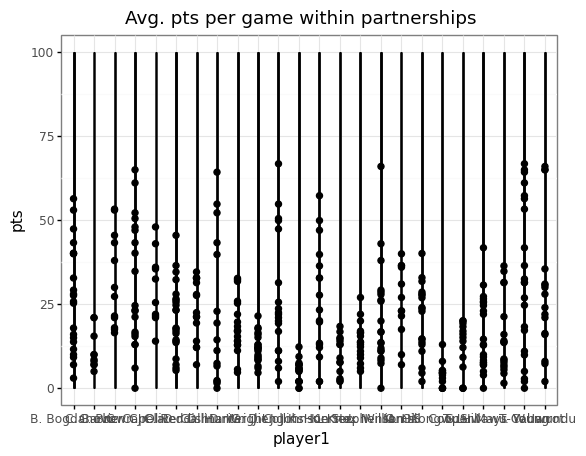

<ggplot: (322756915)>

In [209]:
(
    ggplot(df, aes(x='player1', y='pts'))
    +geom_pointrange(aes(ymin=0, ymax=100))
    + theme_bw()
    + labs(
            title = "Avg. pts per game within partnerships",)

)

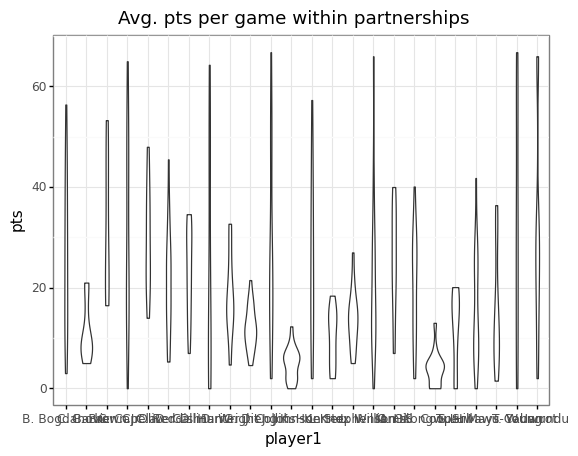

<ggplot: (322706402)>

In [211]:
(
    ggplot(df, aes(x='player1', y='pts'))
    +geom_violin()
    + theme_bw()
    + labs(
            title = "Avg. pts per game within partnerships",)

)

# Making a new df with players who get the most playing time on the Hawks

Players in order of playing time, according to [ESPN](https://www.espn.com/nba/team/stats/_/name/atl/table/game/sort/avgMinutes/dir/desc): 
1. Trae Young PG
2. John Collins PF
3. De'Andre Hunter SF
4. Kevin Huerter SG
5. Bogdan Bogdanovic SG
6. Clint Capela C
- ~~7. Chaundee Brown Jr.~~ *Brown signed a 10-day contract with the Hawks in Dec. 2021. He now plays for the South Bay Lakers.*
- ~~8. Wes Iwundu~~ *Iwundu signed a 10-day contract with the Hawks in Dec. 2021. He now plays for the Cleveland Charge.*
- ~~9. Cam Reddish~~ *Reddish was traded to the New York Knicks on Jan. 13, 2022 😢*
7. Danilo Gallinari PF
- ~~8. Cameron Oliver~~ *Oliver signed a 10-day contract with the Hawks in 2021. He now plays for the South Bay Lakers.*
8. Onyeka Okongwu PF

In [228]:
top_players = df[(df.player1.str.contains('Young'))\
   |(df.player1.str.contains('Collins'))\
   |(df.player1.str.contains('Hunter'))\
   |(df.player1.str.contains('Huerter'))\
   |(df.player1.str.contains('Bogdanovic'))\
   |(df.player1.str.contains('Capela'))\
   |(df.player1.str.contains('Gallinari'))\
   |(df.player1.str.contains('Okongwu'))]

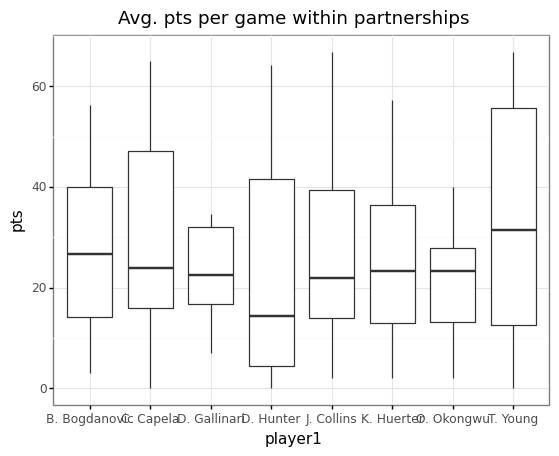

<ggplot: (322775368)>

In [230]:
(
    ggplot(top_players, aes(x='player1', y='pts'))
    +geom_boxplot()
    + theme_bw()
    + labs(
            title = "Avg. pts per game within partnerships",)

)

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: dotplot_ast.png


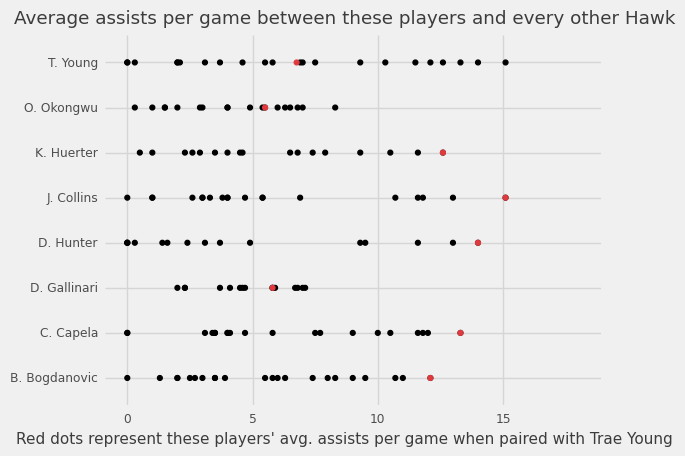

<ggplot: (327911409)>

In [397]:
chart = (
    ggplot(top_players, aes(x='player1', y='ast'))
    +geom_point(aes(ymin=0, ymax=18))
    + geom_point(annotations, color='#E03A3E')
    +coord_flip()
    + theme_538()
    + labs(
            title = "Average assists per game between these players and every other Hawk",
            y = "Red dots represent these players' avg. assists per game when paired with Trae Young",
            x = '')

)

chart.save('dotplot_ast.png')
chart

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


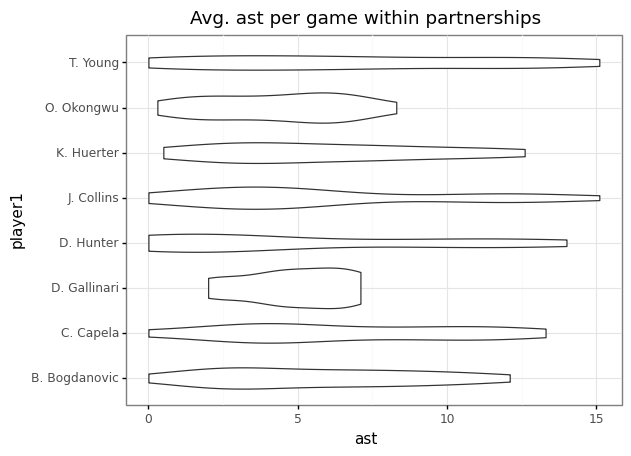

<ggplot: (326634262)>

In [367]:
(
    ggplot(top_players, aes(x='player1', y='ast'))
    +geom_violin(aes(ymin=0, ymax=100))
    #+ geom_point(annotations, color='red')
    +coord_flip()
    + theme_bw()
    + labs(
            title = "Avg. ast per game within partnerships",)

)

In [358]:
top_players.head()

,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank,trae,player1,player2
0,J. Collins - T. Young,ATL,46,23,23,0.500,27.9,25.1,51.8,0.484,7.0,18.8,0.370,9.7,12.4,0.784,5.8,20.0,25.8,15.1,7.1,3.8,2.8,2.7,10.8,11.9,66.8,1.5,3,3,199,75,1,1,2,68,4,2,111,7,5,123,7,1,2,1,201,3,3,196,200,2,1,57,1,J. Collins,T. Young
1,T. Young - D. Hunter,ATL,29,14,15,0.483,26.9,23.9,49.2,0.486,6.6,17.6,0.377,9.8,12.4,0.794,5.4,18.4,23.9,14.0,7.2,3.7,2.5,2.7,10.9,12.0,64.3,-0.5,24,25,178,102,2,2,5,65,5,4,101,6,4,116,9,3,3,2,202,5,5,195,201,1,5,121,1,T. Young,D. Hunter
3,C. Capela - T. Young,ATL,47,24,23,0.511,24.9,23.1,47.6,0.486,6.5,16.9,0.384,8.4,10.8,0.774,5.9,17.9,23.9,13.3,6.2,3.7,2.3,2.6,9.8,10.1,61.1,1.1,2,1,199,74,5,3,7,66,6,6,94,12,9,131,6,5,4,3,199,4,8,194,199,5,6,63,1,C. Capela,T. Young
4,C. Capela - W. Iwundu,ATL,2,1,1,0.500,24.9,23.0,50.5,0.455,8.0,18.5,0.432,11.0,12.0,0.917,7.5,15.5,23.0,12.0,2.0,4.0,2.0,4.5,9.0,10.5,65.0,4.5,135,122,30,75,4,4,3,92,1,3,51,4,6,31,2,14,7,7,103,1,13,202,195,4,3,18,0,C. Capela,W. Iwundu
6,B. Bogdanovic - C. Brown Jr.,ATL,1,0,1,0.000,23.8,21.0,48.0,0.438,6.0,16.0,0.375,5.0,5.0,1.000,7.0,19.0,26.0,11.0,6.0,2.0,3.0,3.0,6.0,5.0,53.0,-11.0,165,170,30,170,7,9,6,117,8,9,105,45,71,1,4,2,1,12,197,29,1,197,175,51,11,203,0,B. Bogdanovic,C. Brown Jr.


In [390]:
top_players.head()
top_players[top_players.trae == 1]
working_df = top_players[['group_name', 'pts', 'ast', 'reb', 'player1', 'player2', 'trae']].copy()
working_df.head()
annotations = working_df[working_df.trae == 1].groupby(by='player1').ast.mean()
annotations = annotations.to_frame().reset_index()
annotations[annotations['player1']=='T. Young']


,player1,ast
7,T. Young,6.759091


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: boxplot_ast.png


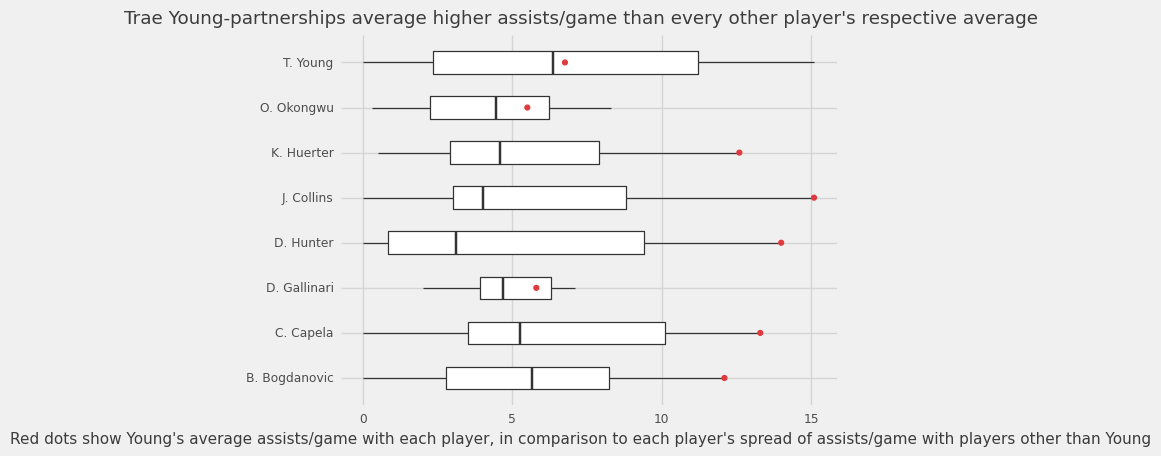

<ggplot: (327487059)>

In [392]:
chart = (
    ggplot(top_players, aes(x='player1', y='ast'))
    + coord_flip()
    + geom_boxplot(position = position_dodge2(padding = .9), width = 0.5)
    + geom_point(annotations, color='#E03A3E')
  #  + geom_text(annotations, label='player1', ha='left', nudge_x=1000)
    + theme_538()
   # + stat_summary(geom='point', fun_y=np.max, color='red')
    + labs(
            title = "Trae Young-partnerships average higher assists/game than every other player's respective average",
            y = "Red dots show Young's average assists/game with each player, in comparison to each player's spread of assists/game with players other than Young",
            x = '')

)
chart.save("boxplot_ast.png")
chart

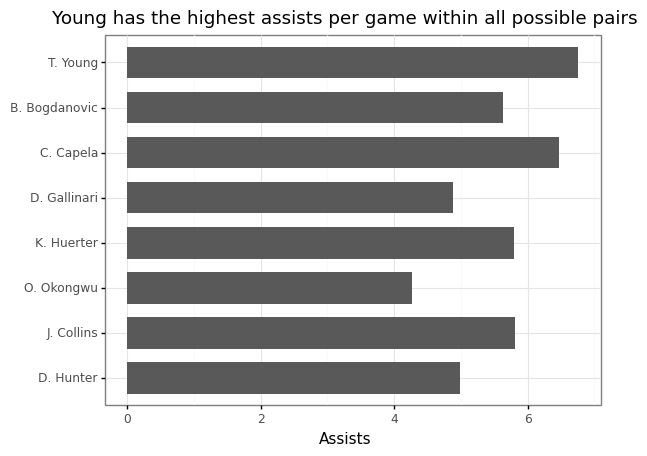

<ggplot: (325005117)>

In [300]:
import numpy as np

(
    ggplot(top_players)
    + aes(x='reorder(player1, ast)', y='ast')
    + geom_bar(stat='summary', fun_y=np.mean, position = position_dodge(width = 1), width = 0.7)
    + coord_flip()
    + theme_bw()
 #   + stat_summary(aes(label=after_stat('round(y)')))
    + labs(
            title = "Young has the highest assists per game within all possible pairs",
            subtitle = "Average assists per game between each player and one other player on the Hawks",
            y = 'Assists',
            x = '')
)


In [319]:
#top_players
# Name is id_vars and Course is value_vars
#pd.melt(df, id_vars =['Name'], value_vars =['Course'])
melted = pd.melt(new, id_vars=['player1'], value_vars=['pts', 'ast', 'reb'])
melted.head()


,player1,variable,value
0,J. Collins,pts,66.8
1,T. Young,pts,64.3
2,C. Capela,pts,61.1
3,C. Capela,pts,65.0
4,B. Bogdanovic,pts,53.0


In [335]:
melted['variable'].replace({
    'pts': 'Points',
    'ast': 'Assists',
    'reb': 'Rebounds'}, inplace=True)

In [336]:
melted.rename(columns={'variable': ''}, inplace=True) 


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: pairings_split_by_player.png


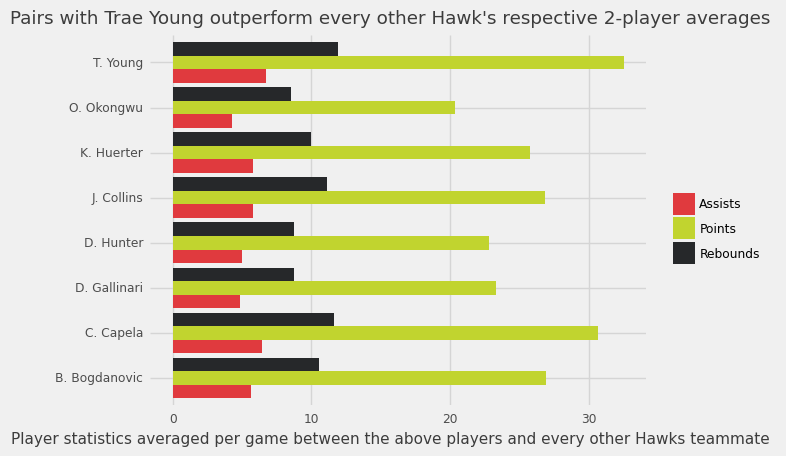

<ggplot: (325677882)>

In [342]:
chart = (
    ggplot(melted)
    + aes(x='player1', y='value', fill='')
    + geom_bar(stat='summary', fun_y=np.mean, position='dodge')
    + coord_flip()
    + theme_538()
#     + stat_summary(
#         aes(label=after_stat('round(y, 1)')),
#         geom='text',
#         fun_y=np.mean,
#         #nudge_x=0.075,
#         size=10,
#         ha='left')
    + scale_fill_manual(values=['#E03A3E', '#C1D42F', '#26282A'])
    + labs(
            title = "Pairs with Trae Young outperform every other Hawk's respective 2-player averages",
            subtitle = "Average performance among player pairs",
            y = 'Player statistics averaged per game between the above players and every other Hawks teammate',
            x = '')
)

chart.save("pairings_split_by_player.png")
chart

**^This is** not that shocking bc Trae is the highest performer on the team. However he doesn't rank first in each of these categories. For example, the Hawks' top rebounder is Clint Capela with 10.6 rebounds per game. 

So, as a next step, we need to compare: 
- pairings with Trae against pairings without Trae: Do Trae's pairings out perform every other possible combination from these players? 
- Individual statistics for each player against their stats as a pair. For example, how does JC compare alone + Trae alone, and how do they compare when playing together, and how does JC compare when playing with other people. This will answer the question: When compared against JC's average stats per game, how does he typically perform when you isolate his gameplay with Trae? How does he typically perform when you isolate his gameplay to anyone but Trae? 

In [ ]:
(
    ggplot(top_players)
    + aes(x='species', y='num_animals', fill='county')
    + geom_bar(stat='identity', position='dodge')
)

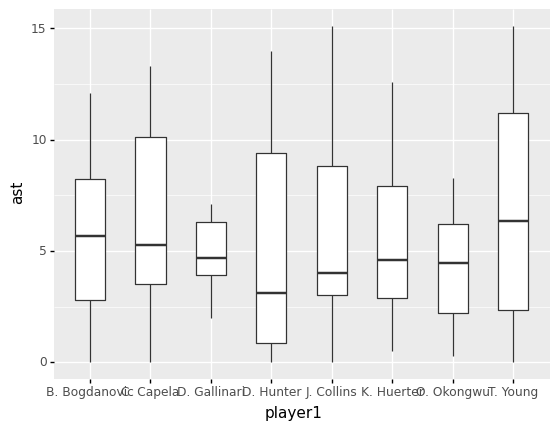

<ggplot: (323936437)>

In [265]:
(
    ggplot(top_players, aes(x='player1', y='ast'))
    + geom_boxplot(position = position_dodge2(padding = 2), width = 0.5)

)

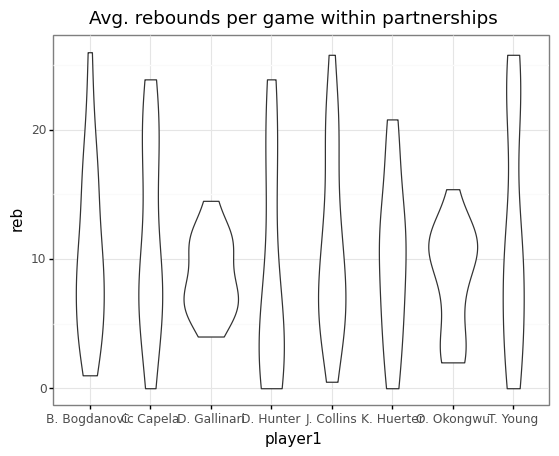

<ggplot: (323371162)>

In [239]:
(
    ggplot(top_players, aes(x='player1', y='reb'))
    +geom_violin()
    + theme_bw()
    + labs(
            title = "Avg. rebounds per game within partnerships",)

)

In [240]:
top_players.head()

,group_name,team_abbreviation,gp,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank,trae,player1,player2
0,J. Collins - T. Young,ATL,46,23,23,0.500,27.9,25.1,51.8,0.484,7.0,18.8,0.370,9.7,12.4,0.784,5.8,20.0,25.8,15.1,7.1,3.8,2.8,2.7,10.8,11.9,66.8,1.5,3,3,199,75,1,1,2,68,4,2,111,7,5,123,7,1,2,1,201,3,3,196,200,2,1,57,1,J. Collins,T. Young
1,T. Young - D. Hunter,ATL,29,14,15,0.483,26.9,23.9,49.2,0.486,6.6,17.6,0.377,9.8,12.4,0.794,5.4,18.4,23.9,14.0,7.2,3.7,2.5,2.7,10.9,12.0,64.3,-0.5,24,25,178,102,2,2,5,65,5,4,101,6,4,116,9,3,3,2,202,5,5,195,201,1,5,121,1,T. Young,D. Hunter
3,C. Capela - T. Young,ATL,47,24,23,0.511,24.9,23.1,47.6,0.486,6.5,16.9,0.384,8.4,10.8,0.774,5.9,17.9,23.9,13.3,6.2,3.7,2.3,2.6,9.8,10.1,61.1,1.1,2,1,199,74,5,3,7,66,6,6,94,12,9,131,6,5,4,3,199,4,8,194,199,5,6,63,1,C. Capela,T. Young
4,C. Capela - W. Iwundu,ATL,2,1,1,0.500,24.9,23.0,50.5,0.455,8.0,18.5,0.432,11.0,12.0,0.917,7.5,15.5,23.0,12.0,2.0,4.0,2.0,4.5,9.0,10.5,65.0,4.5,135,122,30,75,4,4,3,92,1,3,51,4,6,31,2,14,7,7,103,1,13,202,195,4,3,18,0,C. Capela,W. Iwundu
6,B. Bogdanovic - C. Brown Jr.,ATL,1,0,1,0.000,23.8,21.0,48.0,0.438,6.0,16.0,0.375,5.0,5.0,1.000,7.0,19.0,26.0,11.0,6.0,2.0,3.0,3.0,6.0,5.0,53.0,-11.0,165,170,30,170,7,9,6,117,8,9,105,45,71,1,4,2,1,12,197,29,1,197,175,51,11,203,0,B. Bogdanovic,C. Brown Jr.


In [304]:
# Creating a simpler df to see how these visualizations might work in DataWrapper
new = top_players[['group_name', 'pts', 'ast', 'reb', 'player1', 'player2']].copy()
new.head()

,group_name,pts,ast,reb,player1,player2
0,J. Collins - T. Young,66.8,15.1,25.8,J. Collins,T. Young
1,T. Young - D. Hunter,64.3,14.0,23.9,T. Young,D. Hunter
3,C. Capela - T. Young,61.1,13.3,23.9,C. Capela,T. Young
4,C. Capela - W. Iwundu,65.0,12.0,23.0,C. Capela,W. Iwundu
6,B. Bogdanovic - C. Brown Jr.,53.0,11.0,26.0,B. Bogdanovic,C. Brown Jr.


In [245]:
new.head()
new.groupby(by='player1').pts.mean()

player1
B. Bogdanovic    26.936364
C. Capela        30.715000
D. Gallinari     23.306667
D. Hunter        22.806667
J. Collins       26.847368
K. Huerter       25.800000
O. Okongwu       20.338889
T. Young         32.531818
Name: pts, dtype: float64

In [247]:
new.groupby(by='player1').ast.mean()

player1
B. Bogdanovic    5.636364
C. Capela        6.475000
D. Gallinari     4.886667
D. Hunter        4.986667
J. Collins       5.805263
K. Huerter       5.794118
O. Okongwu       4.272222
T. Young         6.759091
Name: ast, dtype: float64

In [246]:
new.groupby(by='player1').reb.mean()
#NOTE TO SELF: Come back and add each of these to their own df to then visualize with a stacked bar chart in datawrapper
# add avg for partnerships WITH trae
# manually add individual's pts/reb/ast per game 

player1
B. Bogdanovic    10.518182
C. Capela        11.645000
D. Gallinari      8.740000
D. Hunter         8.733333
J. Collins       11.131579
K. Huerter       10.005882
O. Okongwu        8.555556
T. Young         11.913636
Name: reb, dtype: float64

In [243]:
#new.to_csv('top_hawks_2122.csv', index=False)

# Working with Rebounds

In [400]:
top_players.head()
working_df = top_players[['group_name', 'pts', 'ast', 'reb', 'player1', 'player2', 'trae']].copy()
working_df.head()
annotations = working_df[working_df.trae == 1].groupby(by='player1').reb.mean()
annotations = annotations.to_frame().reset_index()
annotations.head()

,player1,reb
0,B. Bogdanovic,21.7
1,C. Capela,23.9
2,D. Gallinari,9.8
3,D. Hunter,23.9
4,J. Collins,25.8


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: dotplot_reb.png


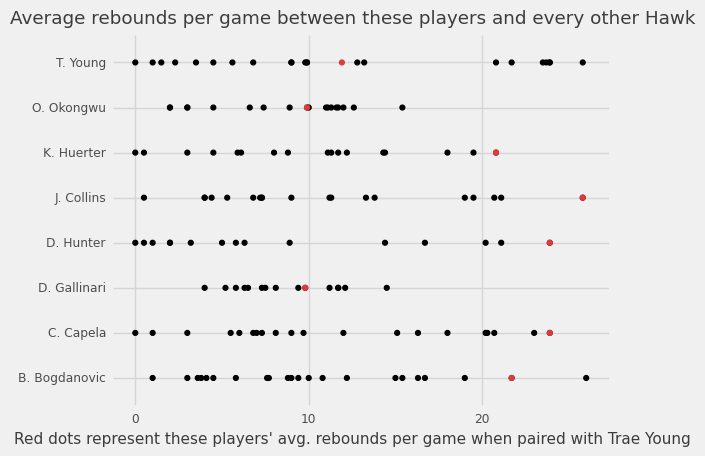

<ggplot: (328030638)>

In [403]:
chart = (
    ggplot(top_players, aes(x='player1', y='reb'))
    +geom_point(aes(ymin=0, ymax=18))
    + geom_point(annotations, color='#E03A3E')
    +coord_flip()
    + theme_538()
    + labs(
            title = "Average rebounds per game between these players and every other Hawk",
            y = "Red dots represent these players' avg. rebounds per game when paired with Trae Young",
            x = '')

)

chart.save('dotplot_reb.png')
chart

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: boxplot_reb.png


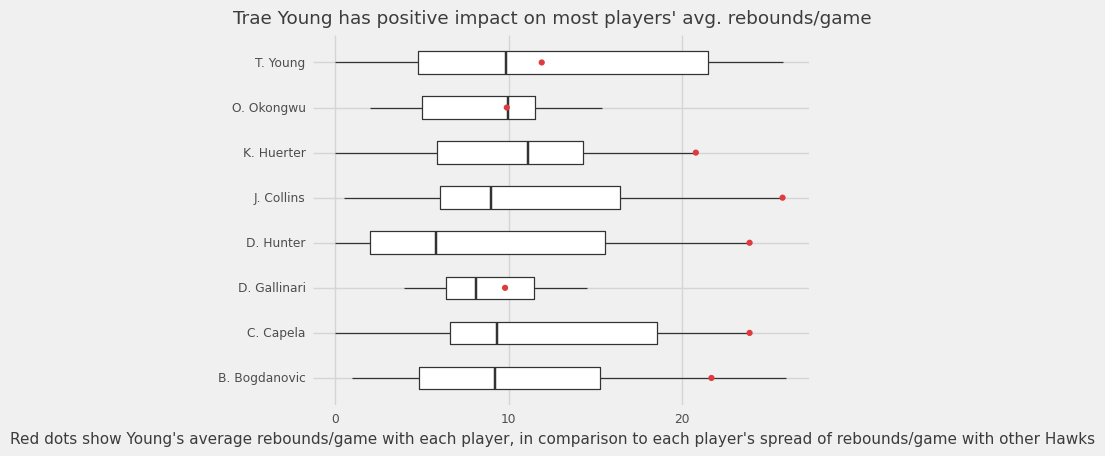

<ggplot: (328120083)>

In [406]:
chart = (
    ggplot(top_players, aes(x='player1', y='reb'))
    + coord_flip()
    + geom_boxplot(position = position_dodge2(padding = .9), width = 0.5)
    + geom_point(annotations, color='#E03A3E')
  #  + geom_text(annotations, label='player1', ha='left', nudge_x=1000)
    + theme_538()
   # + stat_summary(geom='point', fun_y=np.max, color='red')
    + labs(
            title = "Trae Young has positive impact on most players' avg. rebounds/game",
            y = "Red dots show Young's average rebounds/game with each player, in comparison to each player's spread of rebounds/game with other Hawks",
            x = '')

)
chart.save("boxplot_reb.png")
chart